In [109]:
import scipy.stats as sts
import pandas as pd
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
n = 160
mu = 9.5
x_hat =  9.57
sd =0.4

Z = (x_hat - mu) / (sd/(160**0.5))

pvalue = sts.norm.sf(Z) * 2
round(pvalue,4)
# ?sts.norm.sf

0.0269

In [41]:
def zconfint(n,mu,sd, alpha):
    
    z = sts.norm.sf(alpha / 2)
    left_boundary = mu - z *(sd / (n**0.5))
    right_boundary = mu + z *(sd / (n**0.5))
    print z
    return left_boundary, right_boundary

def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):
    z = sts.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

# confint = zconfint(n,mu,sd, alpha)
# print "{} not in range of conf.interval {}".format(u, confint)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae


diamonds = pd.read_csv("diamonds.txt", sep="\t")
X = diamonds.drop(["price"], axis=1)
y = diamonds["price"]

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

model_lin = LinearRegression()
model_rnd = RandomForestRegressor(random_state=1)

model_lin.fit(X_train, y_train)
model_rnd.fit(X_train, y_train)
predict_lin = model_lin.predict(X_test)
predict_rnd = model_rnd.predict(X_test)


print "linear mae: {}".format(mae(y_test, predict_lin))
print "rand forest mae: {}".format(mae(y_test, predict_rnd))

linear mae: 890.376400429
rand forest mae: 802.920517272


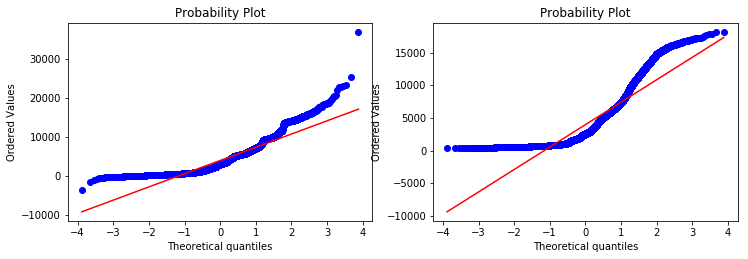

In [43]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
sts.probplot(predict_lin, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
sts.probplot(predict_rnd, dist="norm", plot=pylab)
pylab.show()

In [66]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sts.shapiro(predict_lin)

Shapiro-Wilk normality test, W-statistic: 0.870361, p-value: 0.000000


In [67]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sts.shapiro(predict_rnd)

Shapiro-Wilk normality test, W-statistic: 0.825650, p-value: 0.000000


None of  predicted vectors has normal distribution

Shapiro-Wilk normality test, W-statistic: 0.846876, p-value: 0.000000


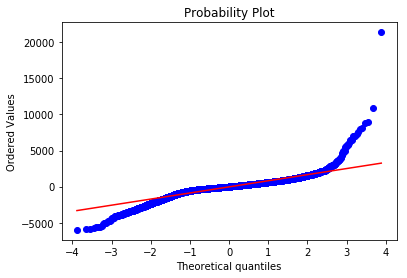

In [73]:
sts.probplot(predict_lin-predict_rnd, dist="norm", plot=pylab)
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sts.shapiro(predict_lin-predict_rnd)

Diff between related "samples" is better approx normal but still I can't say dist. is normal.

In [81]:
print sts.ttest_rel(predict_lin, predict_rnd)
print ""
print "pvalue < alpha(0.05) We can reject Null Hypothesis about 2 samples that have same avg"

Ttest_relResult(statistic=-3.6320745260885796, pvalue=0.00028219466484131133)

pvalue < alpha(0.05) We can reject Null Hypothesis about 2 samples that have same avg


In [23]:
from statsmodels.stats.weightstats import CompareMeans,DescrStatsW

print "95%% confidence interval: [%f, %f]" % DescrStatsW(predict_lin - predict_rnd).tconfint_mean()

95% confidence interval: [-44.252558, -13.230427]


In [178]:
from statsmodels.stats.weightstats import _tconfint_generic

linrnd = (predict_lin-predict_rnd)
mean = np.mean(linrnd)
stdmean = np.std(linrnd, ddof=1)/(len(linrnd) ** 0.5)
map(lambda x: np.floor(x),_tconfint_generic(mean, stdmean, len(linrnd) - 1, 0.05, 'two-sided'))

[-45.0, -14.0]

In [98]:

sts.norm.sf(0.995)

0.15986813217549406

In [165]:
type(map(lambda x: np.around(x,-1),cm.tconfint_diff())[0])

numpy.float64

In [154]:
?np.ceil()

In [169]:
np.around([13.230427, 44.252558],-1)

array([10., 40.])

### PROPORTION CRITERIA TEST

In [51]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sts.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sts.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sts.norm.cdf(z_stat)
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = sts.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [98]:
test_yawn = np.array([1]*10 + [0]*24)
cnt_yawn = np.array([1]*4 + [0]*12)
Z = proportions_diff_z_stat_ind(test_yawn, cnt_yawn)
round(proportions_diff_z_test(Z, alternative="greater"),4)

0.3729

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

bank = pd.read_csv("banknotes.txt", sep="\t")
bank.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [83]:

X1_train, X1_test, y_train, y_test = train_test_split(bank[["X1","X2","X3"]],
                                                     bank["real"],
                                                     random_state=1,
                                                     test_size=0.25)
X4_train, X4_test = train_test_split(bank[["X4","X5","X6"]],
                                                     random_state=1,
                                                     test_size=0.25)

In [85]:
model_x1 = LogisticRegression()
model_x4 = LogisticRegression()

model_x1.fit(X1_train, y_train)
model_x4.fit(X4_train, y_train)

predict_x1 = model_x1.predict(X1_test)
predict_x4 = model_x4.predict(X4_test)

accuracy_x1 = abs(y_test - predict_x1)
accuracy_x4 = abs(y_test - predict_x4)

print "X1 LogR: {}".format(accuracy_score(y_test, predict_x1))
print "X4 LogR: {}".format(accuracy_score(y_test, predict_x4))
print sum(accuracy_x1), sum(accuracy_x4)

X1 LogR: 0.8
X4 LogR: 0.98
10 1


Shapiro-Wilk normality test, W-statistic: 0.628813, p-value: 0.000000


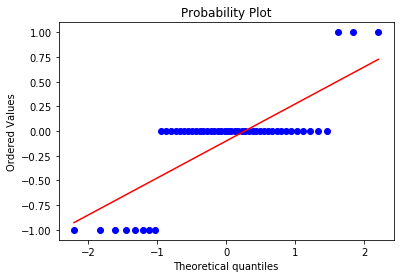

In [20]:
sts.probplot(predict_x1-predict_x4, dist="norm", plot=pylab)
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % sts.shapiro(predict_x1-predict_x4)

In [93]:
# Task 4
print sts.ttest_rel(accuracy_x1, accuracy_x4).pvalue

0.005436282239523237


In [92]:
#Task 5
map(lambda x: round(x,4), proportions_diff_confint_rel(accuracy_x1, accuracy_x4))[0]

0.0599

In [94]:
print "95%% confidence interval: [%f, %f]" % DescrStatsW(accuracy_x1 - accuracy_x4).tconfint_mean()

95% confidence interval: [0.055657, 0.304343]


In [125]:
# Task 6
mu0 = 525
sd = 100
n0 = 200000
######
mu = 541.4
n1 = 100

Z = (mu - mu0) / (sd /n1 **0.5)

round(sts.norm.sf(Z),4)

0.0505

In [123]:
# Task 7
mu = 541.5
Z = (mu - mu0) / (sd /(n1 **0.5))
round(sts.norm.sf(Z),4)

0.0495

447.21359549995793

In [112]:
sd/n0**0.5

0.22360679774997896

16.399999999999977

In [114]:
(mu-mu0)/n0**0.5

0.0366715148309965